In [167]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [168]:
#Import The Necessary Library
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [169]:
#Load The Dataset That is on .excel FIle 
data=pd.read_csv('/content/drive/MyDrive/project/Dataset/winequalityN.csv')
#Head() Is Used the Show the first 5 Rows Of the Dataset 
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [170]:
#Tail() Is Used the Show the first 5 Rows Of the Dataset 
data.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [171]:
#Attributes For Each Columns 
data.keys()

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [172]:
#Check The Shape Of The Dataset 
data.shape

(6497, 13)

In [173]:
#Here Check the datatype for each attribute or column 
data.dtypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [174]:
#Here Get the information for each attribute of dataset 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [175]:
#Check the Null Values of each rows in the dataset
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

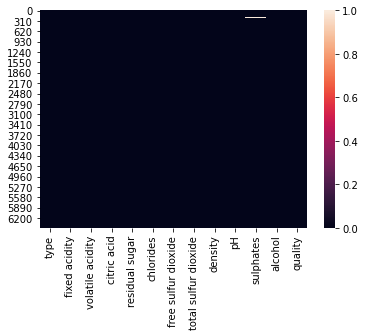

In [176]:
#This is the heatmap that's show the NULL Value is having or not 
sns.heatmap(data.isnull())

In [177]:
data['fixed acidity'].fillna(data['fixed acidity'].mean(), inplace = True)
data['volatile acidity'].fillna(data['volatile acidity'].mean(), inplace = True)
data['citric acid'].fillna(data['citric acid'].mean(), inplace = True)
data['residual sugar'].fillna(data['residual sugar'].mean(), inplace = True)
data['chlorides'].fillna(data['chlorides'].mean(), inplace = True)
data['sulphates'].fillna(data['sulphates'].mean(), inplace = True)
data['pH'].fillna(data['pH'].mean(), inplace = True)

In [178]:
#Check the Null Values of each rows in the dataset
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

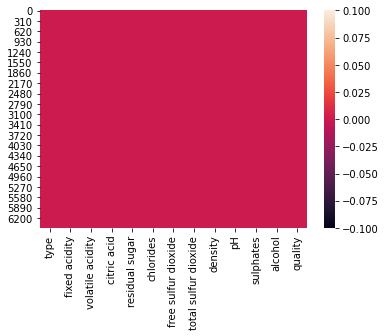

In [179]:
#This is the heatmap that's show the NULL Value is having or not 
sns.heatmap(data.isnull())

In [180]:
categorical = data.select_dtypes(include = ["object"]).keys()
categorical

Index(['type'], dtype='object')

In [181]:
Numerical = data.select_dtypes(include = ["int64"]).keys()
Numerical

Index(['quality'], dtype='object')

In [182]:
Float = data.select_dtypes(include = ["float64"]).keys()
Float

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [183]:
data[Float].describe()#Describe the dataset Column Value 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801
std,1.295751,0.164548,0.145231,4.757392,0.035031,17.749400,56.521855,0.002999,0.160637,0.148768,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [184]:
data[Numerical].describe()#Describe the dataset Column Value 

,quality
count,6497.000000
mean,5.818378
std,0.873255
min,3.000000
25%,5.000000
50%,6.000000
75%,6.000000
max,9.000000


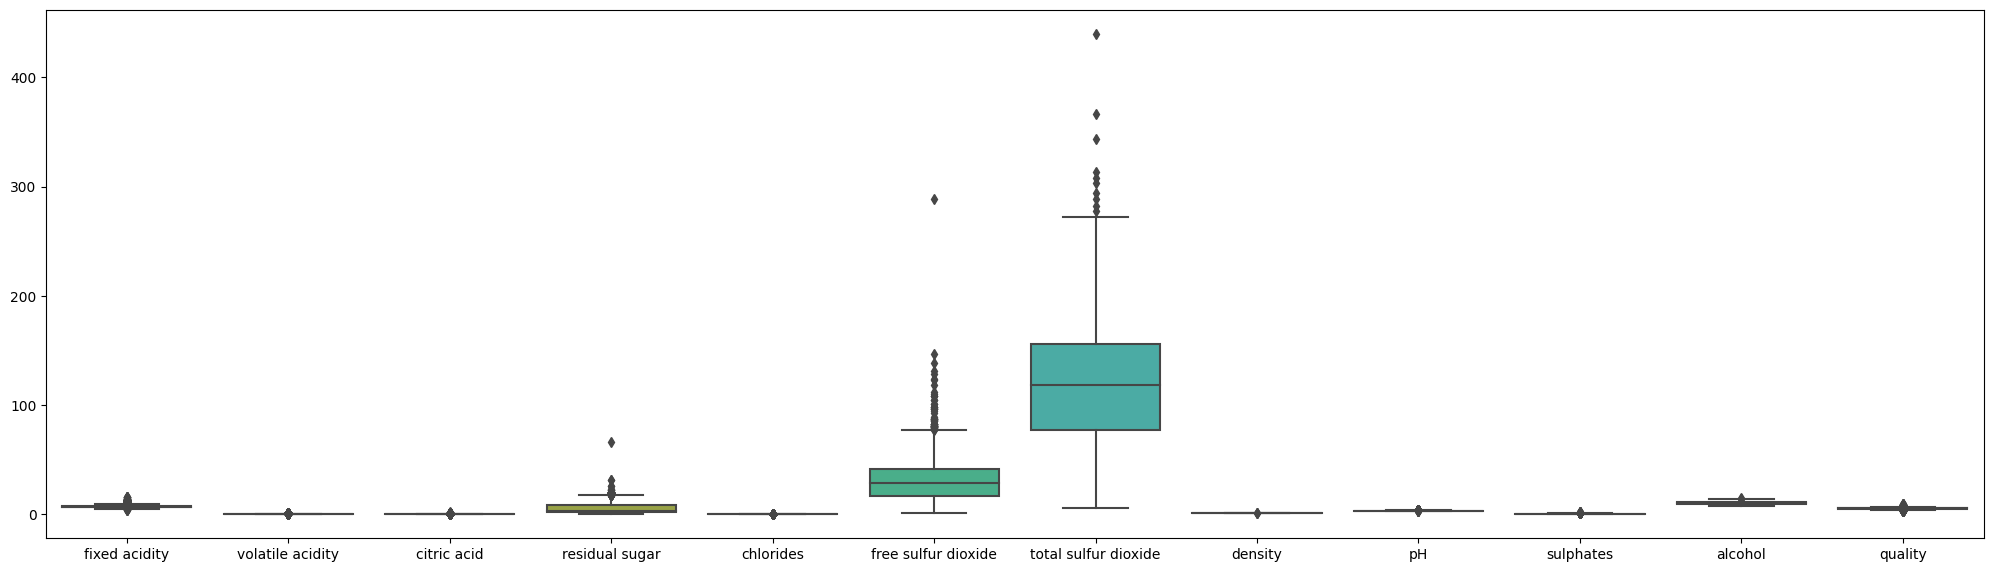

In [185]:
plt.figure(figsize=(25,7),dpi=100)
sns.boxplot(data = data[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']])

In [186]:
from numpy import percentile
columns = data.columns
for j in columns:
    if isinstance(data[j][0], str) :
        continue
    else:
        for i in range(len(data)):
            #defining quartiles
            quartiles = percentile(data[j], [25,75])
            # calculate min/max
            lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
            upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
            if data[j][i] > upper_fence:
                data[j][i] = upper_fence
            elif data[j][i] < lower_fence:
                data[j][i] = lower_fence

In [187]:
data.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [188]:
data.shape

(6497, 13)

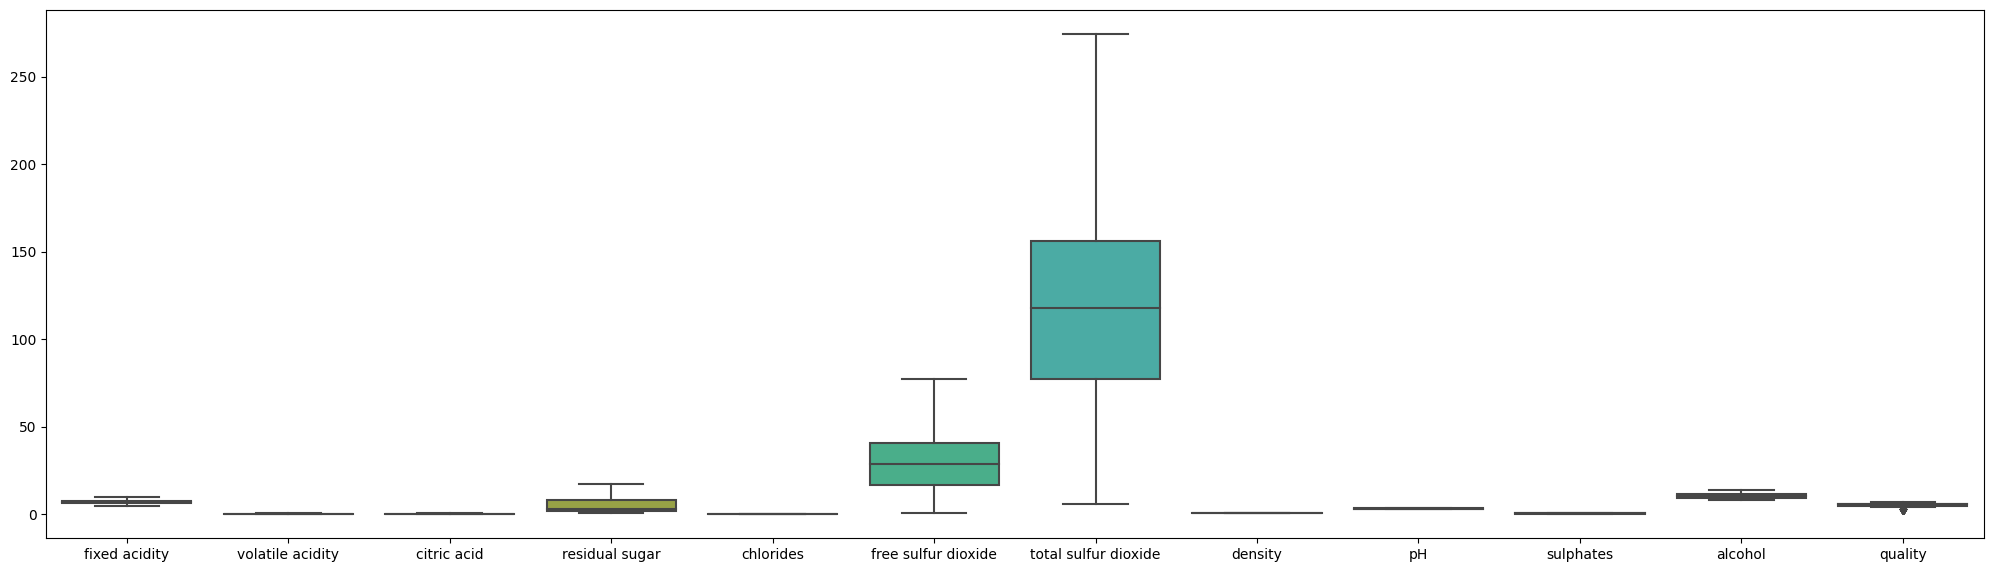

In [189]:
plt.figure(figsize=(25,7),dpi=100)
sns.boxplot(data = data[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']])

In [190]:
from sklearn import preprocessing#Label Encoder is use to convert string column value into integer 
lb=preprocessing.LabelEncoder()

In [191]:
data['type']=lb.fit_transform(data['type'])

In [192]:
data.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


6    2836
5    2138
7    1277
4     216
3      30
Name: quality, dtype: int64

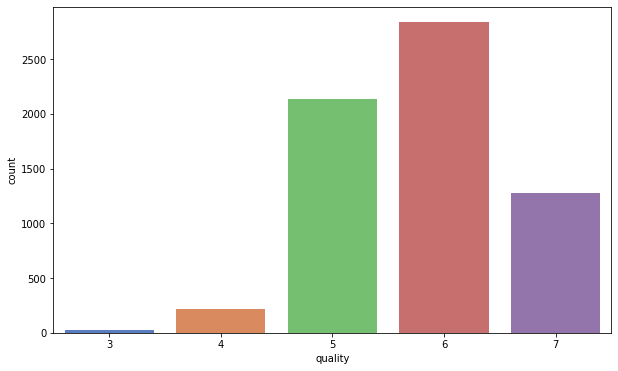

In [193]:
plt.figure(figsize=(10, 6))
sns.countplot(data["quality"], palette="muted")
data["quality"].value_counts()

In [194]:
quality = data["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Medium")

In [195]:
[(i, category.count(i)) for i in set(category)]

[('High', 1277), ('Low', 246), ('Medium', 4974)]

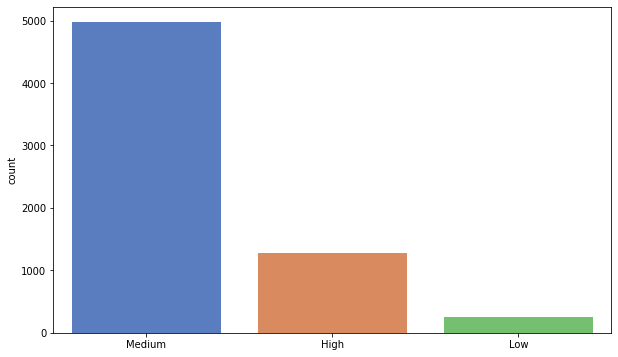

In [196]:
plt.figure(figsize=(10, 6))
sns.countplot(category, palette="muted")

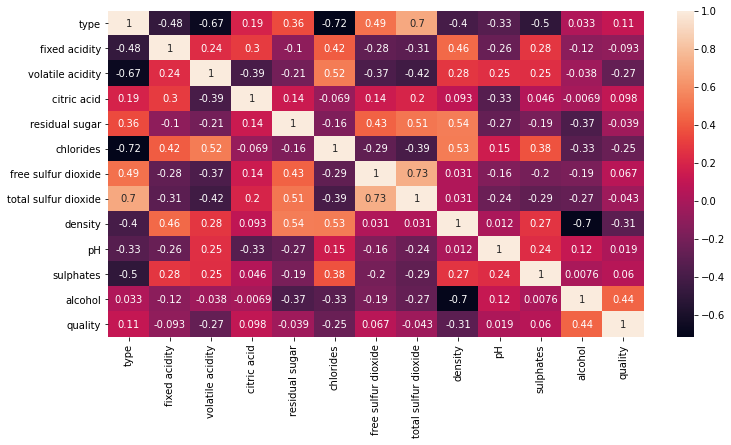

In [197]:
plt.figure(figsize=(12, 6))
sns.heatmap(data.corr(), annot=True)


In [198]:
quality = data["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low")
    elif num > 6:
        category.append("High")
    else:
        category.append("Midium")
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([data, category], axis=1)
data.drop("quality", axis=1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,1,7.0,0.270,0.36,17.55,0.045,45.0,170.0,1.00100,3.00,0.450000,8.8,Midium
1,1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.490000,9.5,Midium
2,1,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.440000,10.1,Midium
3,1,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,Midium
4,1,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.400000,9.9,Midium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,6.2,0.600,0.08,2.00,0.090,32.0,44.0,0.99490,3.45,0.580000,10.5,Midium
6493,0,5.9,0.550,0.10,2.20,0.062,39.0,51.0,0.99512,3.52,0.531215,11.2,Midium
6494,0,6.3,0.510,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.750000,11.0,Midium
6495,0,5.9,0.645,0.12,2.00,0.075,32.0,44.0,0.99547,3.57,0.710000,10.2,Midium


In [199]:
data.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,1,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,Midium
1,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,Midium


In [200]:
from sklearn import preprocessing#Label Encoder is use to convert string column value into integer 
lb=preprocessing.LabelEncoder()

In [201]:
data['category']=lb.fit_transform(data['category'])

In [202]:
data.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,1,7.0,0.27,0.36,17.55,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,2
1,1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,2


In [203]:
x=data.drop('category',axis=1)

In [204]:
y=data['category']

In [205]:
x.shape

(6497, 13)

In [206]:
y.shape

(6497,)

In [207]:
y=y.values.reshape(-1,1)

In [208]:
y.shape

(6497, 1)

In [209]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=25,random_state=42)

In [210]:
x_train.shape

(6472, 13)

In [211]:
y_train.shape

(6472, 1)

In [212]:
x_test.shape

(25, 13)

In [213]:
y_test.shape

(25, 1)

In [214]:
x_train.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

In [215]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
x_train = x_train.copy()
x_test = x_test.copy()

# numerical features
num_cols =['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(x_train[[i]])
    
    # transform the training data column
    x_train[i] = scale.transform(x_train[[i]])
    
    # transform the testing data column
    x_test[i] = scale.transform(x_test[[i]])

In [216]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=5)
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [217]:
pred=lr.predict(x_test)#Pred
print(' prediction \n',pred)#Print Prediction Value 
lr=print('accuracy score\n',accuracy_score(pred,y_test))
print('confusion metrix\n',confusion_matrix(pred,y_test))
print('classification Report \n',classification_report(pred,y_test))

 prediction 
 [0 0 2 2 2 0 2 2 2 2 2 2 2 2 1 0 0 2 0 2 2 2 2 2 0]
accuracy score
 1.0
confusion metrix
 [[ 7  0  0]
 [ 0  1  0]
 [ 0  0 17]]
classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        17

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [218]:
from sklearn.neighbors import KNeighborsClassifier#KNN ALgorithem to learn the model for prediction 
knc = KNeighborsClassifier(n_neighbors=49)
knc.fit(x_train, y_train)#Fit the model 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=49, p=2,
                     weights='uniform')

In [219]:
pred=knc.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
knc=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 0]
accuracy score
 0.96
confusion metrix
 [[ 7  0  0]
 [ 0  0  0]
 [ 0  1 17]]
classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.00      0.00      0.00         0
           2       1.00      0.94      0.97        18

    accuracy                           0.96        25
   macro avg       0.67      0.65      0.66        25
weighted avg       1.00      0.96      0.98        25



In [220]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [221]:
pred=svc.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
svc=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 2 2 2 0 2 2 2 2 2 2 2 2 1 0 0 2 0 2 2 2 2 2 0]
accuracy score
 1.0
confusion metrix
 [[ 7  0  0]
 [ 0  1  0]
 [ 0  0 17]]
classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        17

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [222]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier() #max_leaf_nodes=12 #random_state=1
tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [223]:
pred=tree.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
tree=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 2 2 2 0 2 2 2 2 2 2 2 2 1 0 0 2 0 2 2 2 2 2 0]
accuracy score
 1.0
confusion metrix
 [[ 7  0  0]
 [ 0  1  0]
 [ 0  0 17]]
classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00        17

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25



In [224]:
from sklearn.ensemble import RandomForestClassifier
b = RandomForestClassifier(max_leaf_nodes=14)
b.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=14, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [225]:
pred=b.predict(x_test)#Pred
print(' prediction \n',pred)#print the predicted Value 
b=print('accuracy score\n',accuracy_score(pred,y_test))#Accuracy SCore 
print('confusion metrix\n',confusion_matrix(pred,y_test))#Confusion metrix
print('classification Report \n',classification_report(pred,y_test))#Classsifiaction Report 

 prediction 
 [0 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 2 2 2 0]
accuracy score
 0.96
confusion metrix
 [[ 7  0  0]
 [ 0  0  0]
 [ 0  1 17]]
classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.00      0.00      0.00         0
           2       1.00      0.94      0.97        18

    accuracy                           0.96        25
   macro avg       0.67      0.65      0.66        25
weighted avg       1.00      0.96      0.98        25



In [227]:
from sklearn.externals import joblib
joblib.dump(b,'Wine.pkl')

['Wine.pkl']